<a href="https://colab.research.google.com/github/kripanshsharma/Malaria-Classifications/blob/main/FDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Conv2D , MaxPool2D ,  Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.preprocessing import image
from tensorflow.keras.models import Model
import PIL
import PIL.Image
from PIL import Image
import cv2
from numpy import asarray
import numpy
import pandas as pd

import keras_metrics
print(tf.__version__)

2.12.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 38.98 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (27562/27562), done.


In [7]:
# not needed!
# to be deleted

path1 = "/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_162.png"
Load_image1 = tf.keras.preprocessing.image.load_img(path1)
print("Parasitized Cell :")
Load_image1
path3= '/content/Malaria-Classification-Using-CNN/malaria-dataset/'
img1=Image.open(path1)
numpydata=asarray(img1)

# numpydata=numpydata.flatten()
numpydata=numpydata.reshape(1,-1)
# //print(numpydata)

# df = pd.DataFrame(numpydata)
# excelpath = path1[59:]
# df.to_excel(filepath,index=false)


np.savetxt("/content/Malaria-Classification-Using-CNN/malaria-dataset/file.csv",numpydata, delimiter =",",fmt ='%s',comments='')

Parasitized Cell :


In [8]:
img_width = 100
img_height = 100

In [9]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.4)



In [10]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                          target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   
                                                   )

Found 16536 images belonging to 2 classes.


In [11]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   
                                                   )

Found 11022 images belonging to 2 classes.


Parasitized Cell :


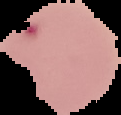

In [12]:
path1 = "/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_162.png"
Load_image1 = tf.keras.preprocessing.image.load_img(path1)
print("Parasitized Cell :")
Load_image1



Uninfected Cell :


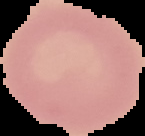

In [13]:
path2 = "/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png"
print("Uninfected Cell :")
Load_image2 = tf.keras.preprocessing.image.load_img(path2)
Load_image2

In [14]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# CNN model

In [15]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape = (img_width,img_height,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        9

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy",tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives(),
          tf.keras.metrics.FalsePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives()])


In [17]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 15,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

<ipython-input-17-e2ef54906d16>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


Epoch 1/15
1034/1034 [==============================] - 233s 220ms/step - loss: 0.4328 - accuracy: 0.7660 - auc: 0.8721 - precision: 0.7659 - recall: 0.7663 - false_negatives: 1932.0000 - false_positives: 1937.0000 - true_negatives: 6331.0000 - true_positives: 6336.0000 - val_loss: 0.1727 - val_accuracy: 0.9417 - val_auc: 0.9785 - val_precision: 0.9132 - val_recall: 0.9760 - val_false_negatives: 132.0000 - val_false_positives: 511.0000 - val_true_negatives: 5000.0000 - val_true_positives: 5379.0000
Epoch 2/15
1034/1034 [==============================] - 223s 216ms/step - loss: 0.1686 - accuracy: 0.9505 - auc: 0.9787 - precision: 0.9368 - recall: 0.9661 - false_negatives: 280.0000 - false_positives: 539.0000 - true_negatives: 7729.0000 - true_positives: 7988.0000 - val_loss: 0.1547 - val_accuracy: 0.9499 - val_auc: 0.9838 - val_precision: 0.9265 - val_recall: 0.9773 - val_false_negatives: 125.0000 - val_false_positives: 427.0000 - val_true_negatives: 5084.0000 - val_true_positives: 5386

In [18]:
history.history

{'loss': [0.4327732026576996,
  0.16858017444610596,
  0.15470467507839203,
  0.14828267693519592,
  0.14617127180099487,
  0.13736434280872345,
  0.13116952776908875,
  0.1295909881591797,
  0.12977446615695953,
  0.12191706895828247,
  0.11933592706918716,
  0.11227601766586304,
  0.11529281735420227,
  0.10930543392896652,
  0.10725616663694382],
 'accuracy': [0.7660256624221802,
  0.9504716992378235,
  0.9545234441757202,
  0.9547048807144165,
  0.9548863172531128,
  0.9554910659790039,
  0.9580914378166199,
  0.9583333134651184,
  0.9563376903533936,
  0.960328996181488,
  0.9594218730926514,
  0.961840808391571,
  0.9610546827316284,
  0.9622036814689636,
  0.9620222449302673],
 'auc': [0.8721315860748291,
  0.9787132740020752,
  0.9820214509963989,
  0.9830119609832764,
  0.983579158782959,
  0.9863147139549255,
  0.9870615601539612,
  0.9878276586532593,
  0.9877547025680542,
  0.9892023801803589,
  0.9898967742919922,
  0.9909063577651978,
  0.9905840158462524,
  0.99160850048

Plotting Graphs and Outputs

In [19]:
def plot_learningCurve(history,epoch):
  #plot learning and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

   #plot learning and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

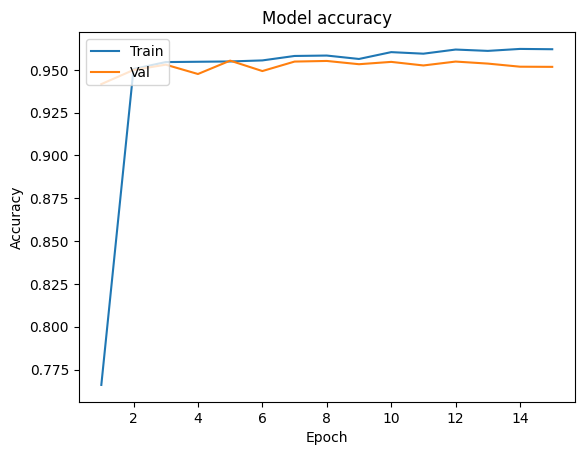

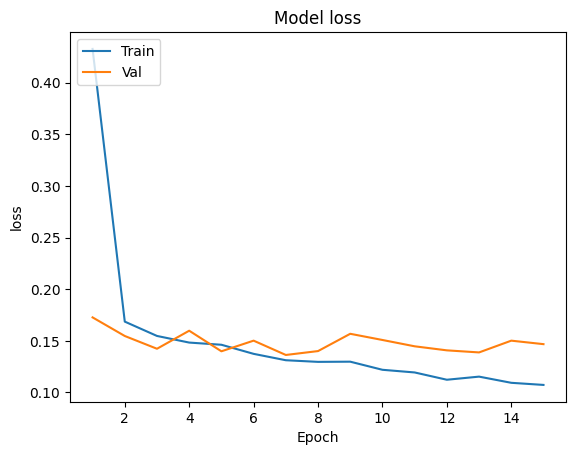

In [20]:
plot_learningCurve(history,15)